### Importing all the headers

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

### Reading the csv

In [3]:
df = pd.read_csv("placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


### Preprocessing

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### EDA 

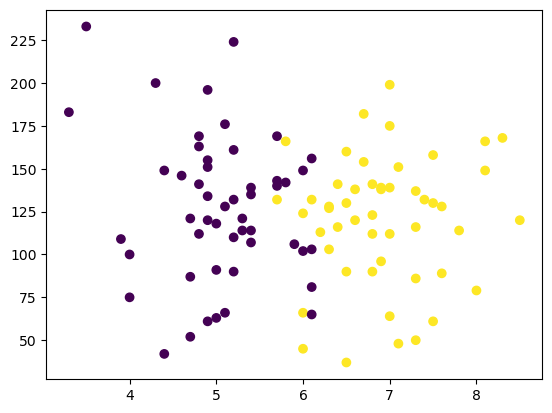

In [11]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

### Splitting independent and dependent data

In [18]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [19]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

### Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [23]:
X_train

,cgpa,iq
3,7.4,132.0
17,3.3,183.0
27,6.0,124.0
59,4.8,112.0
49,5.4,135.0
...,...,...
53,8.3,168.0
39,4.6,146.0
14,6.1,103.0
34,4.8,163.0


### Scaling the data

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.fit_transform(X_test)

### Training the model

In [33]:
clf = LogisticRegression()

In [34]:
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_test

26    1
52    1
64    1
11    1
20    1
81    0
35    1
67    0
41    0
6     0
Name: placement, dtype: int64

### Checking accuracy

In [39]:
accuracy_score(y_test,y_pred)

1.0

### Plotting the division

In [41]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

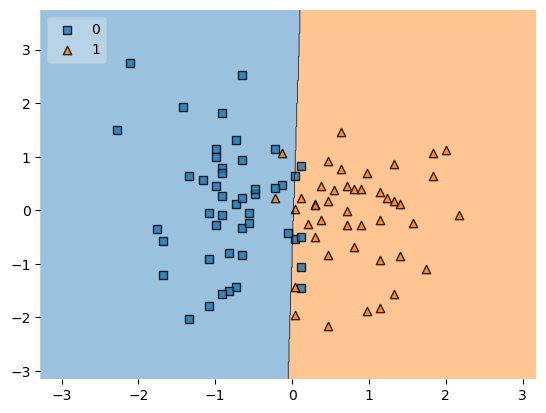

In [43]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)